In [1]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%%bash
cd ..
pwd
tree

/home/edmz/code/E-Dmz/Scripts/VelibScrap
.
├── 04 19
│   └── 10
├── 2021 10 15 Analyses 1
│   ├── 2021 10 15 test-5m.csv
│   ├── PremierGraphe.ipynb
│   ├── Scraping.ipynb
│   ├── Scraping.py
│   ├── test-15-1.csv
│   ├── test-5m.csv:Zone.Identifier
│   ├── test.csv
│   ├── Velib01.png
│   └── Velib API.ipynb
├── 2021 10 17 Analyses 2
│   └── EDA 2021 10 17.ipynb
├── 2021 10 18
│   ├── Graphe.ipynb
│   ├── test-30m.csv
│   ├── test-30m.csv:Zone.Identifier
│   ├── Untitled.ipynb
│   ├── Velib01.png
│   ├── Velib02.png
│   ├── Velib03.png
│   └── Velib04.png
├── Data
│   ├── 2021 10 17 30m.csv
│   ├── 2021 10 17 5m.csv
│   ├── 2021 10 19 30m.csv
│   ├── 2021 10 19 5m.csv
│   ├── test-30m10 19.csv:Zone.Identifier
│   └── test-5m 10 19.csv:Zone.Identifier
├── Scraping.py
├── test-30m-10-17.csv:Zone.Identifier
├── test-5m-10-17.csv:Zone.Identifier
└── test.csv

6 directories, 28 files


In [40]:
df = pd.read_csv('../Data/2021 10 19 30m.csv')
df

,datetime,stationCode,meca,elec,park
0,2021-10-15 00-15,16107,1,1,31
1,2021-10-15 00-15,11104,7,0,12
2,2021-10-15 00-15,9020,8,3,10
3,2021-10-15 00-15,12109,23,3,2
4,2021-10-15 00-15,5001,2,0,41
...,...,...,...,...,...
277803,2021-10-19 06-30,26009,0,0,0
277804,2021-10-19 06-30,17126,10,1,19
277805,2021-10-19 06-30,32012,3,1,31
277806,2021-10-19 06-30,21302,24,7,0


In [41]:
df_means = df.groupby("stationCode").mean()
df_means

,meca,elec,park
stationCode,,,
1001,3.865979,2.262887,7.649485
1002,6.896907,1.376289,10.721649
1003,16.907216,2.479381,18.273196
1006,12.355670,1.690722,14.757732
1007,5.469072,2.273196,6.463918
...,...,...,...
92004,3.768041,1.350515,12.927835
92005,19.067010,2.762887,18.752577
92006,0.340206,1.994845,25.396907


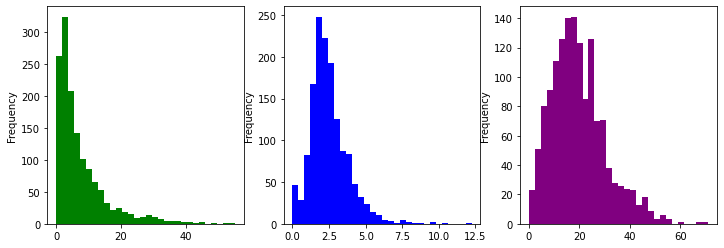

In [43]:
plt.figure(figsize = (12, 4))
plt.subplot(1,3,1, )
df_means.meca.plot.hist(bins = 30, color = 'green')
plt.subplot(1,3,2, )
df_means.elec.plot.hist(bins = 30, color = 'blue')
plt.subplot(1,3,3, )
df_means.park.plot.hist(bins = 30, color = 'purple');

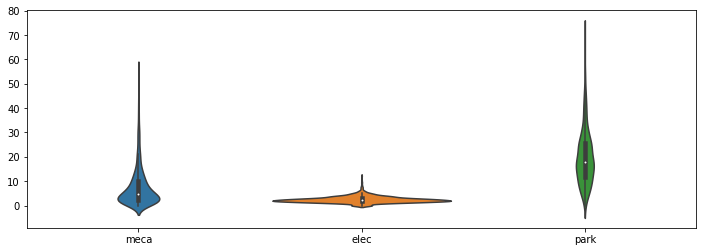

In [44]:
plt.figure(figsize = (12, 4))
sns.violinplot(data = df_means);

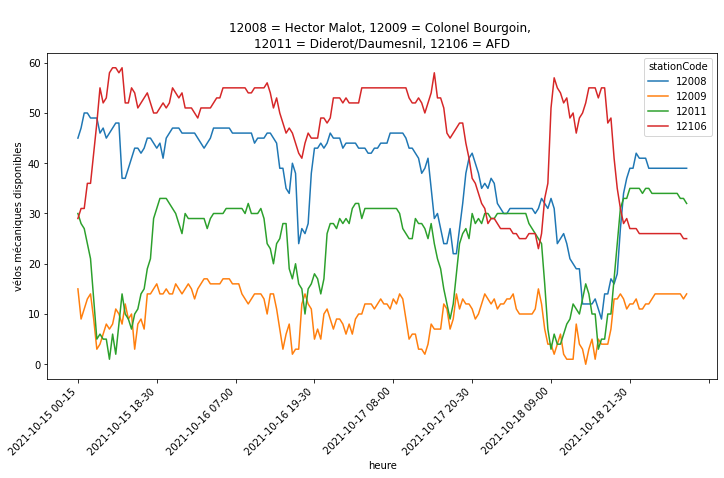

In [46]:
df_home = df[df.stationCode.isin([12008, 12009, 12106, 12011,])]
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
df_home.pivot_table(
    values="meca", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'vélos mécaniques disponibles', 
                                ax = ax,
                                title = """
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

plt.savefig("Velib01.png")